In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")
import torch
from torch import Tensor
import torch.nn as nn
import pandas as pd
import numpy as np
import random

In [3]:
if torch.cuda.is_available():
    print("cuda is available")
    print(f"{torch.cuda.device_count()} GPU detected")
else:
    print("cuda not available")

print(f"torch version as {torch.__version__}")

cuda is available
1 GPU detected
torch version as 1.13.1


In [2]:
data_folder = "../../data/semantic_segmentation/VOCdevkit/VOC2012"

In [3]:
# train.txt 存储了训练集文件名
train_set = "ImageSets/Segmentation/train.txt"
train_set = os.path.join(data_folder, train_set)
with open(train_set, 'r') as f:
    images = f.read().split()
print(images[:10])

['2007_000032', '2007_000039', '2007_000063', '2007_000068', '2007_000121', '2007_000170', '2007_000241', '2007_000243', '2007_000250', '2007_000256']


In [11]:
# 尝试读取其中一个图片
import torchvision
img = torchvision.io.read_image(os.path.join(data_folder, 'JPEGImages', '2007_000032.jpg')) # num_channels, height, width

In [12]:
img.shape

torch.Size([3, 281, 500])

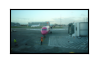

In [13]:
from matplotlib import pyplot as plt
_, axes = plt.subplots(1, 1, figsize=(1, 1))
axes.imshow(img.permute(1,2,0).numpy()) # plt的输入shape是(height, width, num_channels)
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

In [23]:
# 尝试读取对应的标签
import torchvision
label = torchvision.io.read_image(os.path.join(data_folder, 'SegmentationClass', '2007_000032.png')) # num_channels, heights, width

In [24]:
label.shape

torch.Size([1, 281, 500])

In [25]:
# 0是黑色背景，255是白色边框，1和15说明该图片中共有两个不同区域
torch.unique(label)

tensor([  0,   1,  15, 255], dtype=torch.uint8)

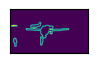

In [30]:
_, axes = plt.subplots(1, 1, figsize=(1, 1))
axes.imshow(label.permute(1,2,0).numpy()) # plt的输入shape是(height, width, num_channels)
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

In [26]:
# 用rgb模式去读取label
mode = torchvision.io.image.ImageReadMode.RGB
label_rgb = torchvision.io.read_image(os.path.join(data_folder, 'SegmentationClass', '2007_000032.png'), mode) # num_channels, heights, width

In [27]:
label_rgb.shape

torch.Size([3, 281, 500])

In [29]:
torch.unique(label_rgb)

tensor([  0, 128, 192, 224], dtype=torch.uint8)

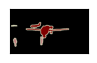

In [31]:
_, axes = plt.subplots(1, 1, figsize=(1, 1))
axes.imshow(label_rgb.permute(1,2,0).numpy()) # plt的输入shape是(height, width, num_channels)
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)